# 01: Fits

In [1]:
import SMEFT19
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from flavio.statistics.functions import pull

INFO:matplotlib.font_manager:generated new fontManager


In [2]:
obslist = SMEFT19.SMEFTglob.loadobslist(True)
print(len(obslist))

586


## Scenario I
Fit only to `C`, `beta_l` and `beta_q`

In [3]:
def fit(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [4]:
bf, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.117, 0, 0.751])

Minimizing...
Pull: 5.989850280029074 sigma


In [5]:
bf

array([-1.24169353e-01, -1.53636656e-05,  8.40148973e-01])

In [6]:
-2*L

43.32411938977422

In [7]:
SMEFT19.ellipse.save(bf, v, d, L, '../data/ellipses/rotBI.yaml', name='Mass Rotation fit, Scenario I',
                     fit='rotBI')

### Confidence intervals scenario I

In [8]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,3)
dchi

3.5267403802617303

In [9]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit(np.array(bf) + np.array([err,0,0]))-L)

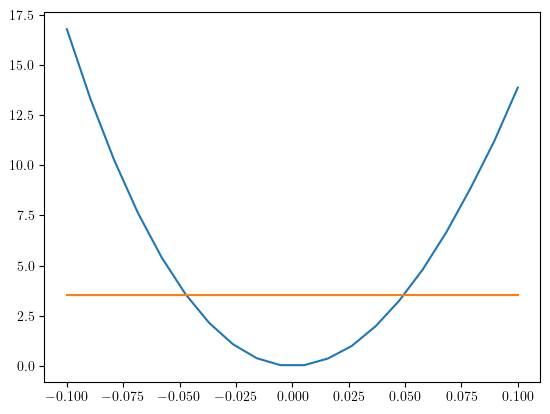

In [10]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi,dchi])

**Error in C:** $\pm 0.05$ 

In [11]:
delta_bl = []
for err in np.linspace(-0.1, 0.1, 20):
    delta_bl.append(fit(np.array(bf) - np.array([0,err,0]))-L)

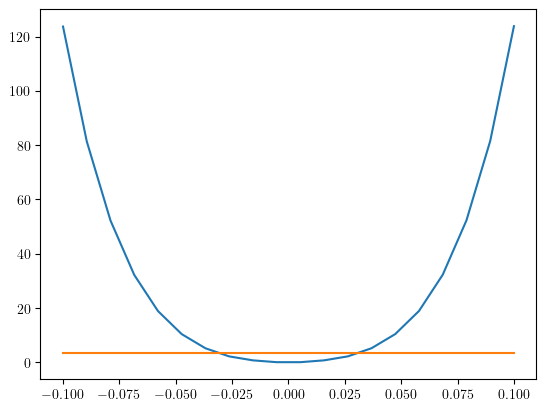

In [12]:
plt.plot(np.linspace(-0.1, 0.1, 20), delta_bl)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in $\beta^\ell$:** $\pm 0.03$

In [13]:
delta_bq = []
for err in np.linspace(-2.0, 2.0, 20):
    delta_bq.append(fit(np.array(bf) + np.array([0,0,err]))-L)

(-1.0, 2.0)

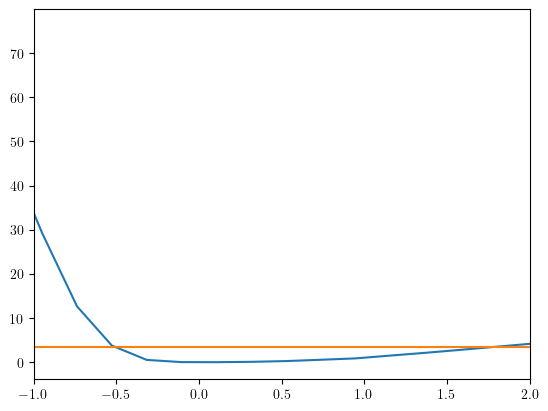

In [14]:
plt.plot(np.linspace(-2, 2, 20), delta_bq)
plt.plot([-2, 2], [dchi, dchi])
plt.xlim([-1,2])

**Error in $\beta^q$:** ${}^{+1.7}_{-0.5}$

## Scenario II
Fit to all parameters

In [15]:
def fit2(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBII)

In [16]:
from iminuit import Minuit

m = Minuit(fit2, [-0.128, 0, 0, 0, 0.81])
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -22.69                     │              Nfcn = 27               │
│ EDM = 1.05 (Goal: 0.1)           │           time = 801.3 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  -0.1274  │  0.0012   │            │            │         │         │       │
│ 1 │ x1   │   0.018   │   0.022   │            │            │         │         │       │
│ 2 │ x2   │   0.009   │   0.015   │            │            │         │         │       │
│ 3 │ x3   │   -0.06   │   0.06    │            │            │         │         │       │
│ 4 │ x4   │   0.814   │   0.008   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [17]:
bf2, v2, d2, L2 = SMEFT19.ellipse.minimum(fit2, [-0.1274, 0.018, 0.009, -0.06, 0.814])

Minimizing...
Pull: 5.701870104267608 sigma


In [18]:
bf2

array([-1.24142128e-01,  3.21513287e-02, -5.42871866e-06,  1.62377880e-02,
        8.55621324e-01])

In [19]:
-2*L2

45.43229192540508

In [20]:
SMEFT19.ellipse.save(bf2, v2, d2, L2, '../data/ellipses/rotBII.yaml', name='Mass Rotation fit, Scenario II',
                     fit='rotBII')

### Confidence intervals scenario II

In [21]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,5)
dchi

5.887595445915204

In [22]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit2(np.array(bf2) + np.array([err,0,0,0,0]))-L2)

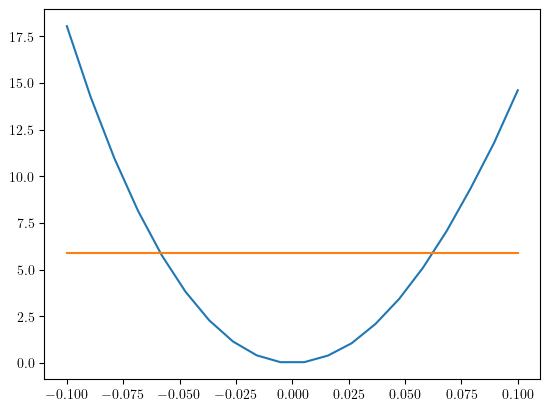

In [23]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in C:** $\pm 0.06$

In [24]:
delta_al = []
for err in np.linspace(-0.07, 0.07, 20):
    delta_al.append(fit2(np.array(bf2) + np.array([0,err,0,0,0]))-L2)

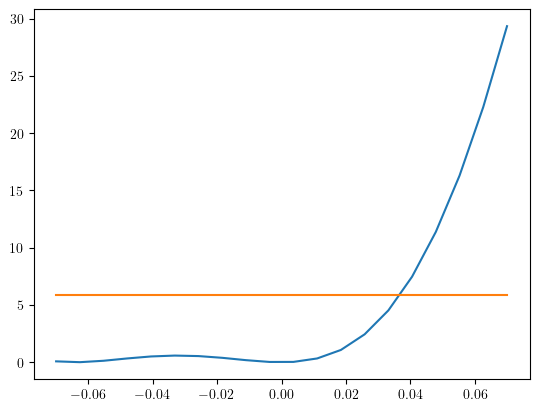

In [25]:
plt.plot(np.linspace(-0.07, 0.07, 20), delta_al)
plt.plot([-0.07, 0.07], [dchi, dchi])

**Error in $\alpha^\ell$:** ${}_{-0.04}^{+0.04}$

In [26]:
delta_bl = []
for err in np.linspace(-0.06, 0.06, 20):
    delta_bl.append(fit2(np.array(bf2) - np.array([0,0,err,0,0]))-L2)

(-10.0, 80.0)

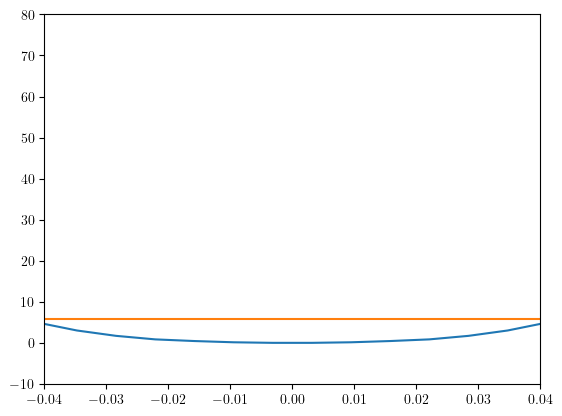

In [27]:
plt.plot(np.linspace(-0.06, 0.06, 20), delta_bl)
plt.plot([-0.06, 0.06], [dchi, dchi])
plt.xlim([-0.04, 0.04])
plt.ylim([-10, 80])

**Error in $\beta^\ell$:** $\pm0.04$

In [28]:
delta_aq = []
for err in np.linspace(-0.15, 0.07, 20):
    delta_aq.append(fit2(np.array(bf2) - np.array([0,0,0,err,0]))-L2)

(-0.12, 0.07)

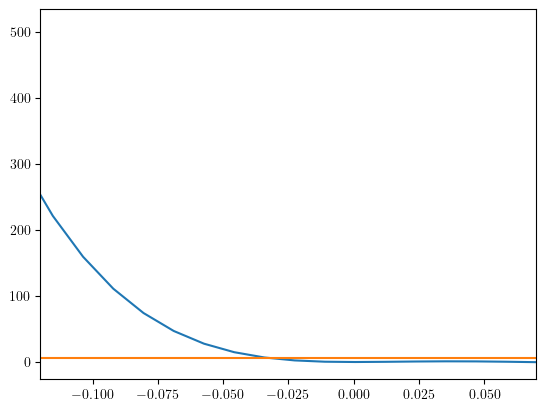

In [29]:
plt.plot(np.linspace(-0.15, 0.07, 20), delta_aq)
plt.plot([-0.15, 0.07], [dchi, dchi])
plt.xlim([-0.12, 0.07])

**Error in $\alpha^q$:** ${}_{-0.03}^{+0.16}$

In [30]:
delta_bq = []
for err in np.linspace(-0.7, 2.8, 20):
    delta_bq.append(fit2(np.array(bf2) + np.array([0,0,0,0,err]))-L2)

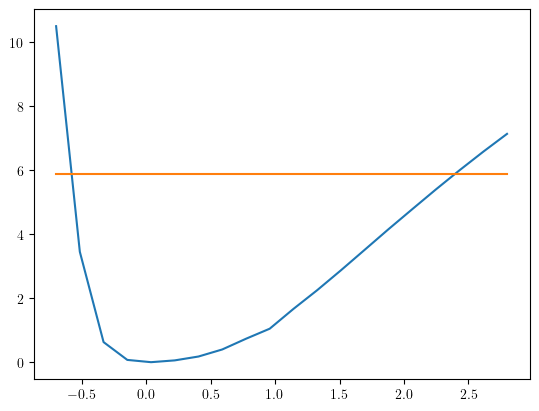

In [31]:
plt.plot(np.linspace(-0.7, 2.8, 20), delta_bq)
plt.plot([-0.7,2.8], [dchi, dchi])

**Error in $\beta^q$:** ${}^{+2.8}_{-0.6}$

In [32]:
pull(2*(L-L2), 2)

0.9374819050251112

### Matrix $\lambda^\ell$

In [33]:
SMEFT19.scenarios.idemp(bf2[1], bf2[2])

matrix([[ 1.03264049e-03, -1.74360280e-07,  3.21181279e-02],
        [-1.74360280e-07,  2.94405533e-11, -5.42311274e-06],
        [ 3.21181279e-02, -5.42311274e-06,  9.98967359e-01]])

In [34]:
al = np.random.uniform(0, 0.11, 200)
bl = np.random.uniform(-0.025, 0.025, 200)

In [35]:
ll = []
for i in range(200):
    ll.append(SMEFT19.scenarios.idemp(al[i], bl[i]))

In [36]:
np.std(ll, axis=0)

array([[0.003612  , 0.00089969, 0.0319264 ],
       [0.00089969, 0.00018709, 0.01481217],
       [0.0319264 , 0.01481217, 0.00359993]])

### Matrix $\lambda^q$

In [37]:
SMEFT19.scenarios.idemp(bf2[3], bf2[4])

matrix([[1.52201072e-04, 8.01996449e-03, 9.37326393e-03],
        [8.01996449e-03, 4.22597748e-01, 4.93907452e-01],
        [9.37326393e-03, 4.93907452e-01, 5.77250051e-01]])

In [38]:
aq = np.random.uniform(bf2[3]-0.07, bf2[3]+0.12, 200)
bq = np.random.uniform(bf2[4]-0.6, bf2[4]+2.8, 200)

In [39]:
lq = []
for i in range(200):
    lq.append(SMEFT19.scenarios.idemp(aq[i], bq[i]))

In [40]:
np.std(lq, axis=0)

array([[0.00204362, 0.02074128, 0.0210477 ],
       [0.02074128, 0.24532628, 0.07962065],
       [0.0210477 , 0.07962065, 0.24455568]])

### Wilson coefficients

In [41]:
w = SMEFT19.scenarios.rotBII(bf2)
w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)

In [42]:
C9 = w2.values['C9_bsmumu']['Re']
C10 = w2.values['C10_bsmumu']['Re']
C9e = w2.values['C9_bsee']['Re']
C10e = w2.values['C10_bsee']['Re']
Ctau = w2.values['CVL_bctaunutau']['Re']
print(f'C9e = {C9e}')
print(f'C10e = {C10e}')
print(f'C9mu = {C9}')
print(f'C10mu = {C10}')
print(f'CVLtau = {Ctau}')

C9e = -0.57116195458573
C10e = -0.07443912370695112
C9mu = -0.6436077917398682
C10mu = -0.001993286552833942
CVLtau = 0.09169774417511324


In [43]:
-C10e+C9

-0.569168668032917

In [44]:
Clq = np.random.uniform(bf2[0]-0.08, bf2[0]+0.08, 200)

In [45]:
WC = [[], [], [], [], []]
for i in range(200):
    w = SMEFT19.scenarios.rotBII((Clq[i], al[i], bl[i], aq[i], bq[i]))
    w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)
    WC[0].append(w2.values['C9_bsmumu']['Re'])
    WC[1].append(w2.values['C10_bsmumu']['Re'])
    WC[2].append(w2.values['C9_bsee']['Re'])
    WC[3].append(w2.values['C10_bsee']['Re'])
    WC[4].append(w2.values['CVL_bctaunutau']['Re'])

In [46]:
np.std(WC, axis=1)

array([0.20394995, 0.01301128, 0.24752413, 0.22829343, 0.02944732])

## Observable Pulls

In [47]:
SMEFT19.SMEFTglob.loadobslist(new=True)

['a_mu',
 ['<BR>(D0->pienu)', 2, 2.98],
 ['<dBR/dq2>(Bs->phimumu)', 2.5, 4.0],
 'Rtaul(B->D*lnu)',
 ['<FL>(B+->K*mumu)', 2.5, 4],
 ['<P2>(B0->K*mumu)', 0.1, 0.98],
 ['<dBR/dq2>(Bs->phimumu)', 1.1, 2.5],
 ['<dBR/dq2>(Bs->phimumu)', 4.0, 6.0],
 ['<BR>(D0->pienu)', 2.6, 2.98],
 'BR(B+->Knunu)',
 ['<dR/dtheta>(ee->WW)', 198.38, 0.8, 1.0],
 ['<P5p>(B0->K*mumu)', 4, 6],
 ['<BR>(D0->Kenu)', 1.6, 1.7],
 ['<dBR/dq2>(Bs->phimumu)', 0.1, 0.98],
 'BR(W->taunu)',
 'epsp/eps',
 'AFB(Z->bb)',
 ['<BR>(D0->Kenu)', 1.6, 1.88],
 ['<BR>/BR(B->D*taunu)', 10.4, 10.93],
 ['<BR>(D+->pienu)', 2, 2.98],
 ['<Dmue_AFB>(B0->D*lnu)', 0, 4.85],
 'A(Z->ee)',
 ['<BR>(D0->Kenu)', 1.5, 1.6],
 ['<dR/dtheta>(ee->WW)', 189.09, 0.8, 1.0],
 ['Btilde_n', 0.591],
 ['<P4p>(B0->K*mumu)', 4, 6],
 ['<P8p>(B0->K*mumu)', 1.1, 2.5],
 ['<P3>(B0->K*mumu)', 1.1, 2.5],
 ['<S7>(Bs->phimumu)', 0.1, 0.98],
 ['<dBR/dq2>(B+->K*mumu)', 4.0, 6.0],
 ['<S3>(Bs->phimumu)', 4.0, 6.0],
 ['<dBR/dq2>(B+->K*mumu)', 15.0, 19.0],
 ['<BR>(D0->pienu)', 1.6

In [48]:
SMEFT19.comparepulls.compare(SMEFT19.scenarios.rotBII, '../data/ellipses/rotBII.yaml', '../data/TeX/pullsBII')

[Link to the table](https://github.com/Jorge-Alda/SMEFT19/blob/master/TeX/standalone_pullsBII.pdf)

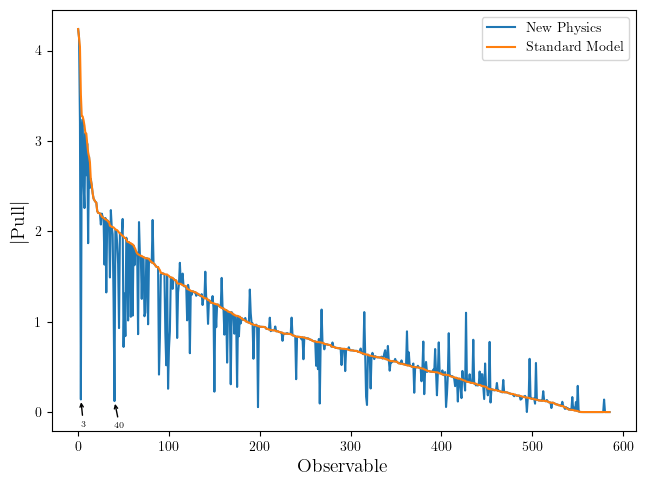

In [49]:
SMEFT19.plots.compare_plot(SMEFT19.scenarios.rotBII, '../data/ellipses/rotBII.yaml', '../data/plots/rotBII', 1.5)

In [50]:
evo = [0]*5
ranges = [[-0.08, 0.08], [-0.18, 0.07], [-0.025, 0.025], [-0.07, 0.12], [-0.6,2.8]]
labels = [r'$C$', r'$\alpha^\ell$', r'$\beta^\ell$', r'$\alpha^q$', r'$\beta^q$']
labelsplain = ['C', 'alphal', 'betal', 'alphaq', 'betaq']
fits = ['RK', 'RD', 'LFV', 'global']
fitcodes = {'RK':'likelihood_lfu_fcnc.yaml', 'RD':'likelihood_rd_rds.yaml',
            'LFV':'likelihood_lfv.yaml', 'global':'global'}
fitlabels = {'RK':r'$R_{K^{(*)}}$', 'RD':r'$R_{D^{(*)}}$',  'LFV':'LFV', 'global':'Global'}
fitcolors = {'RK':(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
             'RD':(0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
             'LFV':(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
             'global':(1.0, 0.4980392156862745, 0.0)}

In [51]:
values_fit2 = SMEFT19.ellipse.load("../data/ellipses/rotBII.yaml")
bf2 = values_fit2["bf"]

In [52]:
for i in range(5):
    xvalues = bf2[i] + np.linspace(ranges[i][0], ranges[i][1], 200)
    evoi = []
    for x in xvalues:
        bfx = bf2.copy()
        bfx[i] = x
        evoi.append(SMEFT19.likelihood_fits(bfx, SMEFT19.scenarios.rotBII))
    evo[i] = evoi

$C$
$\alpha^\ell$
$\beta^\ell$
$\alpha^q$
$\beta^q$


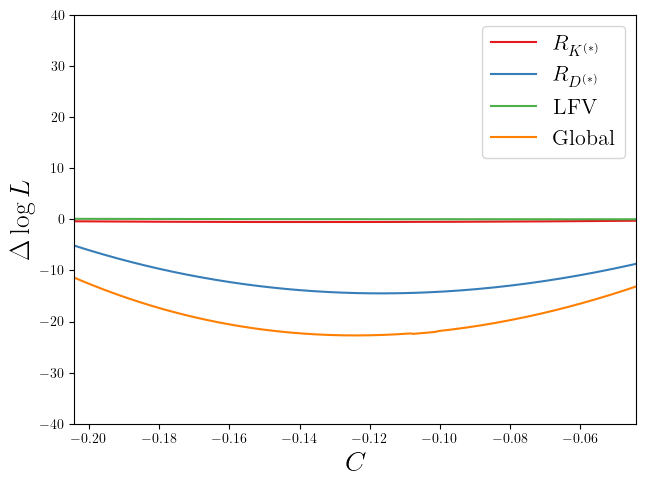

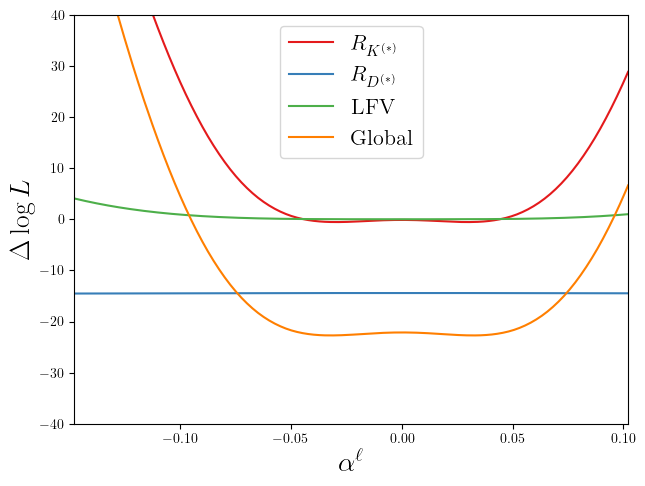

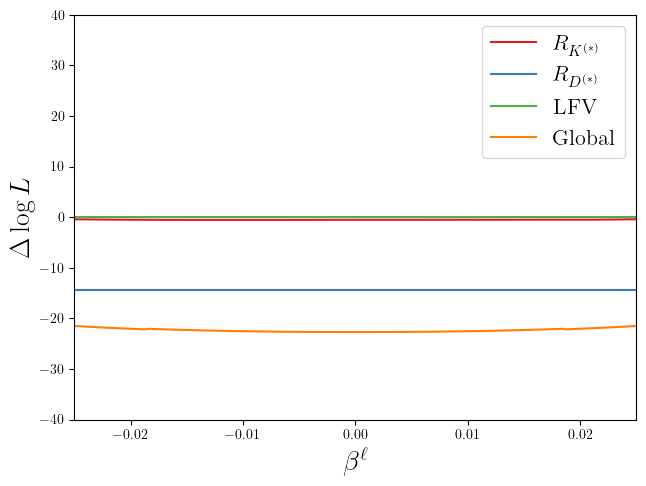

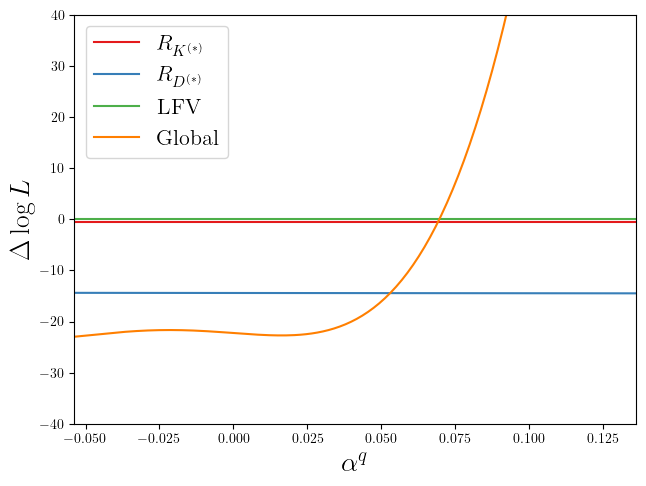

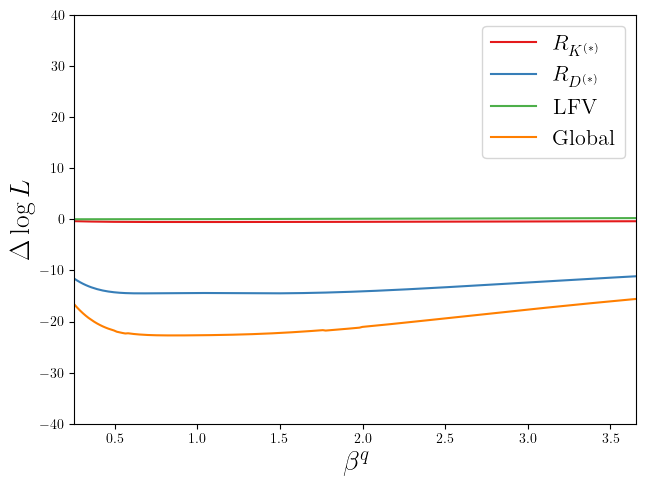

In [53]:
for i in range(0,5):
    xvalues = bf2[i] + np.linspace(ranges[i][0], ranges[i][1], 200)
    fig = plt.figure()
    print(labels[i])
    for f in fits:
        plt.plot(xvalues, -pd.DataFrame(evo[i])[fitcodes[f]], lw=1.5, label=fitlabels[f], color=fitcolors[f])
    plt.ylim([-40,40])
    plt.xlim([bf2[i]+ranges[i][0], bf2[i]+ranges[i][1]])
    plt.legend(fontsize=16)
    plt.xlabel(labels[i], fontsize=20)
    plt.ylabel(r'$\Delta \log L$', fontsize=20)
    plt.tight_layout(pad=0.5)
    fig.savefig(f'../data/plots/evoplot_{labelsplain[i]}.pdf')
    fig.savefig(f'../data/plots/evoplot_{labelsplain[i]}.pgf')

## Leptoquark couplings

In [54]:
values_fitI = SMEFT19.ellipse.load("../data/ellipses/rotBI.yaml")
bf = values_fitI["bf"]

In [55]:
SMEFT19.scenarios.rot2lqU1(bf)

Casting complex values to real discards the imaginary part


matrix([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -7.38744319e-06,  4.80838583e-01],
        [ 0.00000000e+00, -8.79301580e-06,  5.72325384e-01]])

In [56]:
SMEFT19.scenarios.rot2lqU1(bf2)

matrix([[ 2.96312027e-04, -5.00319799e-08,  9.21616740e-03],
        [ 1.56136347e-02, -2.63634609e-06,  4.85629531e-01],
        [ 1.82483001e-02, -3.08120663e-06,  5.67575301e-01]])